## Part 2.1

According to the heat map below, we can see that there is, on average, a moderate negative correlation between the gender and various male dominated traits (Height, Weight, etc.) and a moderate positive correlation between gender and female dominated traits (Total Fat Content, Total Body Fat Ratio, etc.). For example, as gender "increases" the weight decreases. Gender is encoded only with 2 integer values. We can assume that when we have the greater value (1), the weight values will not be as high, representing a strong negative correlation between the traits (approximately -0.73). Since the male dominated traits of height, weight, lean mass, muscle mass, and visceral muscle area all had negative correlation, the value encoded for males is 0. Therefore, the value encoded for females must be 1.

In [32]:
from DataInvestigator import df
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
selected_columns = [
    "Gender",
    "Height",
    "Weight",
    "Lean Mass (LM) (%)",
    "Muscle Mass (MM)",
    "Visceral Muscle Area (VMA) (Kg)",
    "Total Fat Content (TFC)",
    "Total Body Fat Ratio (TBFR) (%)",
    "Obesity (%)"
]

filtered_df= df[selected_columns]
corr_matrix = filtered_df.corr()

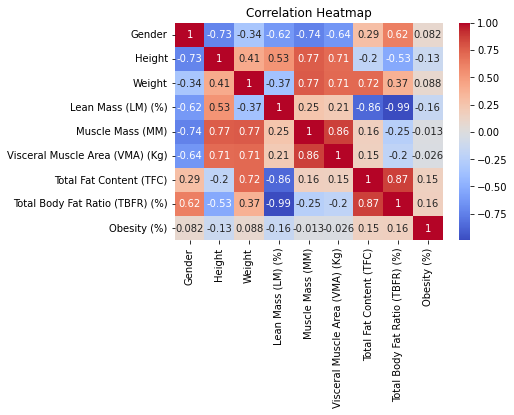

In [34]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Part 2.2

Based on the histogram with KDE plot (the curve for smooth visualization instead of using 'bins'), the glucose values are not normally distributed. In fact, the values are skewed right. If we treated this as a normal distribution, the "normal" range using IQR is [66.5, 134.5]. The outlier values will either fall below the lower bound or exceed the upper bound of the computed range. For the values in our dataset, there are 25 outliers all exceeding the upper bound of 134.5. Additionally, I made a box and whisker plot to visualize the outliers. As shown below, all of the outliers are to the right of the max value in our range (vertical line).

In [40]:
from DataInvestigator import DataInvestigator

In [41]:
di = DataInvestigator(df)
glucose_index = di.get_label_index("Glucose")
glucose_values = di.get_values(glucose_index)

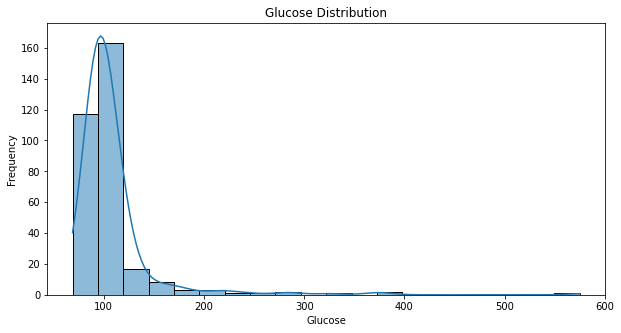

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(glucose_values, kde=True, bins=20)
plt.title("Glucose Distribution")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

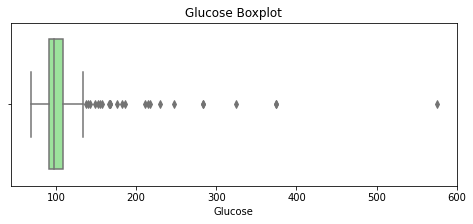

In [43]:
plt.figure(figsize=(8,3))
sns.boxplot(x=glucose_values, color="lightgreen")
plt.title("Glucose Boxplot")
plt.xlabel("Glucose")
plt.show()

In [44]:
q1 = glucose_values.quantile(0.25)
q3 = glucose_values.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f'"Normal" range: [{lower_bound}, {upper_bound}]')

outliers = glucose_values[(glucose_values < lower_bound) | (glucose_values > upper_bound)]
print("Outliers:")
print(outliers)

"Normal" range: [66.5, 134.5]
Outliers:
20     374.0
40     575.0
50     140.0
62     138.0
79     176.0
81     183.0
90     215.0
96     247.0
107    157.0
121    142.0
149    168.0
158    211.0
159    155.0
161    168.0
189    152.0
200    230.0
217    149.0
230    168.0
239    186.0
242    284.0
250    284.0
294    218.0
303    166.0
310    325.0
312    375.0
Name: Glucose, dtype: float64
